In [0]:
import os
from getpass import getpass
user = getpass('GitHub user')
password = getpass('GitHub password')
os.environ['GITHUB_AUTH'] = user + ':' + password
!git clone https://$GITHUB_AUTH@github.com/chengmar09/comp0053.git  

GitHub user··········
GitHub password··········
Cloning into 'comp0053'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 70 (delta 29), reused 42 (delta 13), pack-reused 0
Unpacking objects: 100% (70/70), done.


In [0]:
!echo 'Check Current Dir'
%cd /content/comp0053/
%tensorflow_version 1.x
!pwd && ls
!pip install -r Requirement.txt
!pip install h5py

Check Current Dir
/content/comp0053
TensorFlow 1.x selected.
/content/comp0053
COMP0053_EmoPain_Demo.ipynb  Feature_Selection.ipynb  Requirement.txt
data			     helper.py		      Synthetic_Data.ipynb
Data_Overview.ipynb	     README.md		      train.py
  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=7b60eb73462990a7f0a26a57a6ec37cc4c5c0ca41a6ebfca86fed164bf56378e
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
pip install wget

In [0]:
pip install tensorflow

  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=bcb711805630a1de10bc31ff529f3cf96fcfc5745be35ce22c064c15e311ea3c
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3


In [0]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [0]:
from helper import *
import scipy

movementDataLoader = DataReader('Movementdata') #<- Automatically download data
(train_x, train_y), (valid_x, valid_y) = movementDataLoader.more_more_processing(v_stack=False)

Using TensorFlow backend.


Folder exists
Training zip file exists
Validation zip file exists
Train data already exists
Valid data already exists
There is total of 23 training data
There is total of 12 Validation data


# Visualising the imbalance 

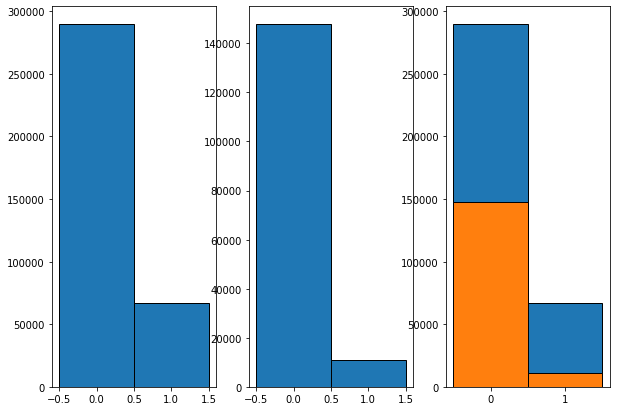

In [0]:
import matplotlib.pyplot as plt

def visualise_imbalance(train_y, valid_y ,labels=[0,1]):

    fig, axes= plt.subplots(nrows=1, ncols=3, figsize = (10,7))
    plt.xticks((0,1))
    axes[0].hist(train_y, label=labels, bins=[-.5,.5,1.5], ec="k")
    axes[1].hist(valid_y, label=labels, bins=[-.5,.5,1.5], ec="k")

    axes[2].hist(train_y, label=labels, bins=[-.5,.5,1.5], ec="k")
    axes[2].hist(valid_y, label=labels, bins=[-.5,.5,1.5], ec="k")

    plt.show()

visualise_imbalance(train_y,valid_y)

Class Imbalance

<br>
Looking at the histogram for Ground Truth, we can see that our dataset is heavily biased towards 0 class. From this we can conlude
that when choosing algorithms to apply to the dataset, we must be wary of choosing ones that are sensitve to class
imbalance, as they may be heavily biased towards the more prevalent class.
This fact also suggests that using a simple metric for evaluating the quality of a model, such as misclassification loss may produce a poor estimate for generalisation loss, as the algorithm may learn to simply always predict the more common class and still obtain high accuracy. <br>

<br>
Finally, given the imbalance of classes in the dataset, when constructing validation sets (or cross-validation folds) for validation if chosen poorly we have a high likelihood of obtaining subsets of only the non-default data, resulting in poor estimates for the true generalisation loss. Hence, this visualization suggests that it might be worthwhile investing in using
stratified techniques when splitting the data for validation.

2D Scatterplot of the imbalance


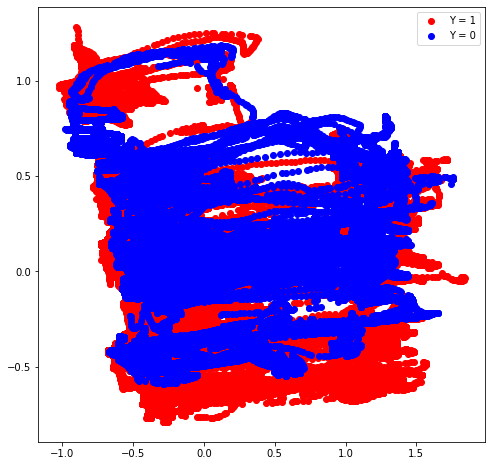

3D Scatterplot of the imbalance


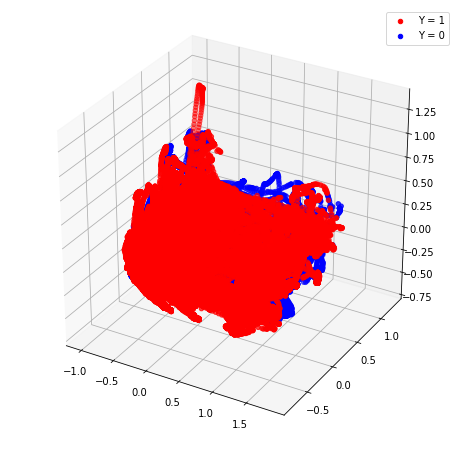

In [0]:
#Dimensionality Reduction imports
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import time
from mpl_toolkits.mplot3d import Axes3D
def transform_and_plot(model, data=train_x, labels=train_y):
    """
    Fits a given model over the scaled dataset and plots the result
    :param model - the untrained model to be fitted over the data
    :param data - the scaled data to be transformed
    :param labels - the corresponding labels for the data
    """

    reduced = model.fit_transform(data)
    dimensions = reduced.shape[1]
    print("{}D Scatterplot of the imbalance".format(dimensions))
    labelled = np.c_[reduced, labels]
    assert dimensions == 2 or dimensions == 3, 'transform only supports 2 or 3 dimensions'
    projection = None
    if dimensions == 3:
        projection = '3d'
    
    figure = plt.figure(figsize=(8,8))
    ax = figure.add_subplot(1,1,1, projection=projection)
    neg = reduced[labelled[:,dimensions] == 0]
    pos = reduced[labelled[:,dimensions] == 1]
    ax.scatter(*(neg[:,i] for i in range(dimensions)), c='r')
    ax.scatter(*(pos[:,i] for i in range(dimensions)), c='b')
    ax.legend(['Y = 1', 'Y = 0'])
    plt.show()
#     time.sleep(10)

transform_and_plot(PCA(n_components=2), train_x, train_y)
transform_and_plot(PCA(n_components=3), train_x, train_y)
